# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [24]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "./"

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

cp: ./utils.py and ./utils.py are identical (not copied).


In [25]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib notebook  
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


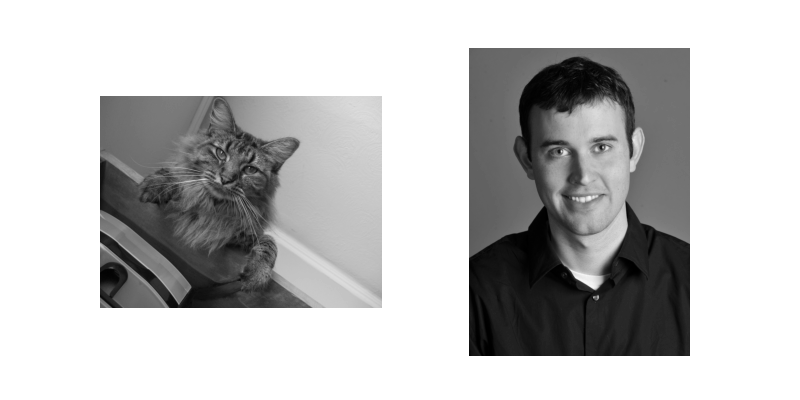

(-0.5, 731.5, 1023.5, -0.5)

In [26]:
im1_file = datadir + 'nutmeg.jpg'
im2_file = datadir + 'DerekPicture.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

fig, axes = plt.subplots(1, 2, figsize=(8,4))

axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')

axes[0].axis('off')
axes[1].axis('off')


<IPython.core.display.Javascript object>


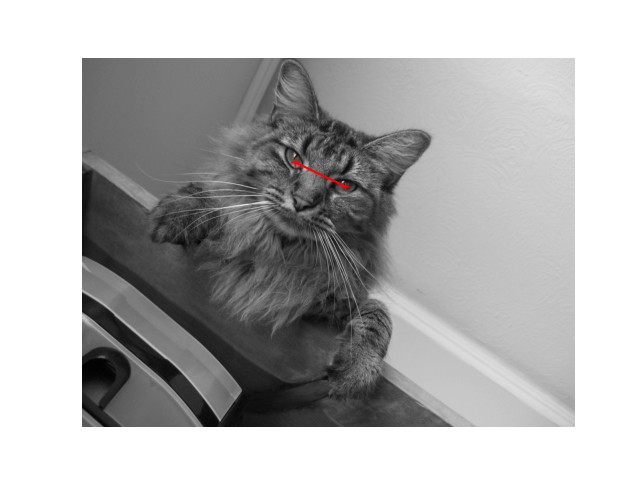

In [27]:
pts_im1 = utils.prompt_eye_selection(im1)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>


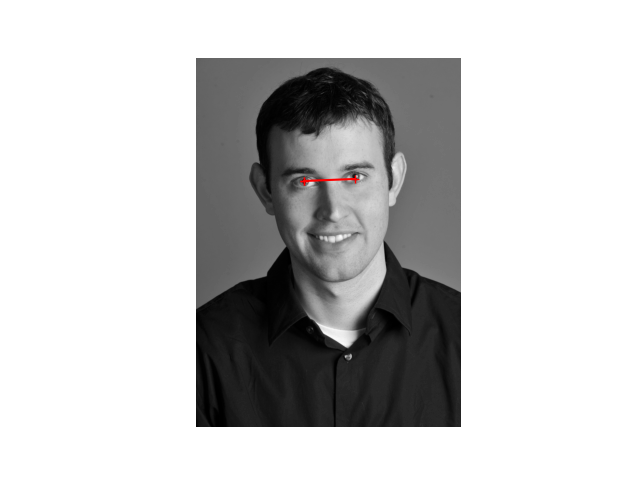

In [29]:
pts_im2 = utils.prompt_eye_selection(im2)
# pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [30]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [31]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


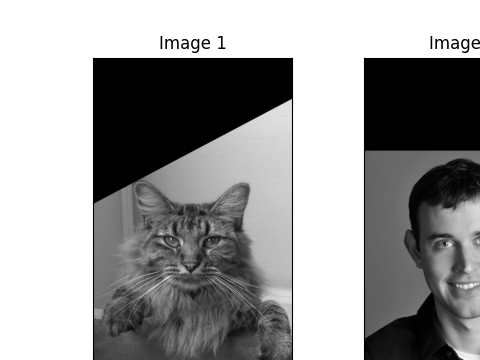

In [49]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

<IPython.core.display.Javascript object>


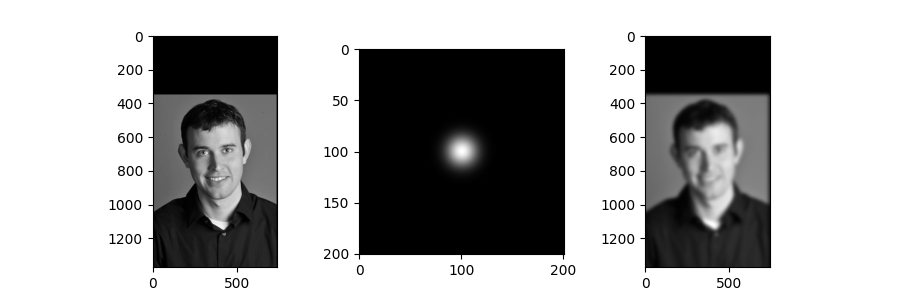

In [64]:
# filter with person image:
#lowpass filter test for the first image:
gaussian_kernel_2 = utils.gaussian_kernel(10, 100)

new_im2 = cv2.filter2D(im2, -1, gaussian_kernel_2)

fig, axes = plt.subplots(1, 3, figsize=(9,3))
axes[0].imshow(im2, cmap='gray')
axes[1].imshow(gaussian_kernel_2, cmap='gray')
axes[2].imshow(new_im2, cmap='gray')

<IPython.core.display.Javascript object>


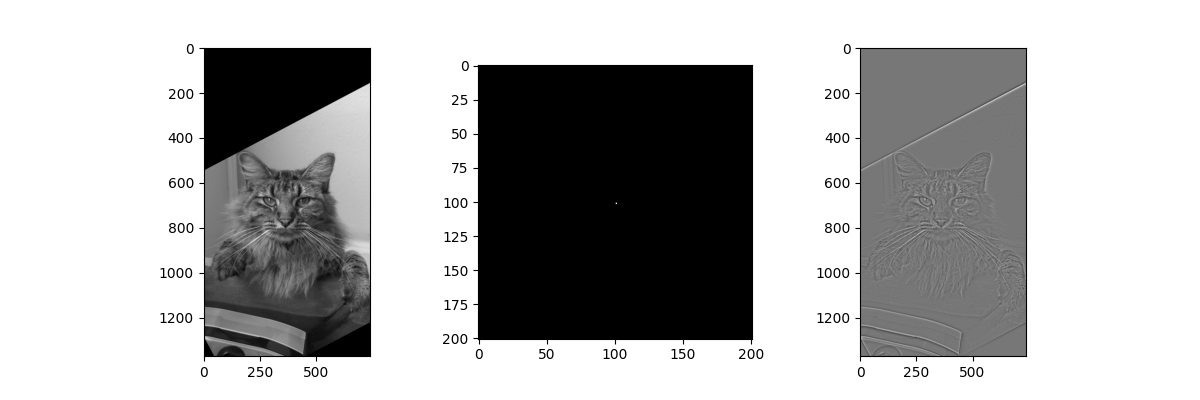

In [102]:
# filter with cat image:
# impulse filter minus gaussian filter:
impulse_filter = np.zeros((201, 201))
impulse_filter[101, 101] = 1
gaussian_kernel_1 = utils.gaussian_kernel(5, 100)
combined_filter = impulse_filter - gaussian_kernel_1

new_im1 = cv2.filter2D(im1, -1, combined_filter)

fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(impulse_filter, cmap='gray')
axes[2].imshow(new_im1, cmap='gray')

<IPython.core.display.Javascript object>


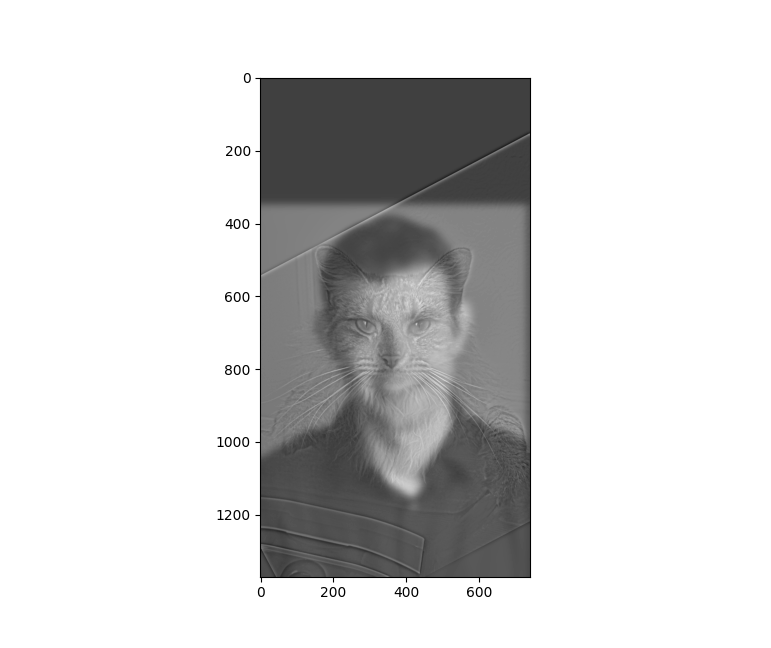

In [103]:
# combine the two images:
im3 = 0.5*new_im1 + 0.5*new_im2

fig, axes = plt.subplots(1, 1, figsize=(4,4))
axes.imshow(im3, cmap='gray')

In [104]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''
    # im2 filtering
    gaussian_kernel_2 = utils.gaussian_kernel(sigma_low, 100)
    new_im2 = cv2.filter2D(im2, -1, gaussian_kernel_2)

    # im1 filtering
    impulse_filter = np.zeros((201, 201))
    impulse_filter[101, 101] = 1
    gaussian_kernel_1 = utils.gaussian_kernel(5, 100)
    combined_filter = impulse_filter - gaussian_kernel_1

    new_im1 = cv2.filter2D(im1, -1, combined_filter)
                           
    # combining into a hybrid image
    im_hybrid = 0.5*new_im1 + 0.5*new_im2
    
    return im_hybrid

<IPython.core.display.Javascript object>


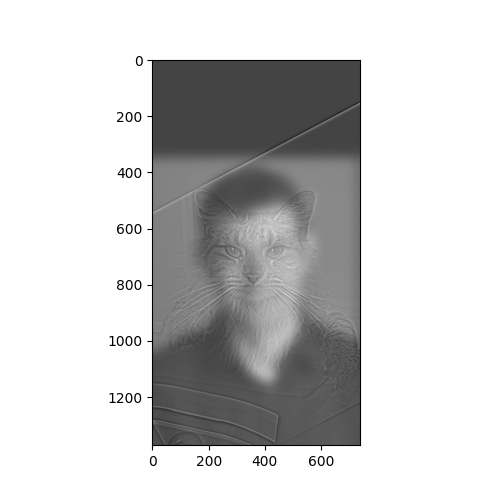

In [108]:
sigma_low = 20 # choose parameters that work for your images
sigma_high = 20

im_hybrid = hybridImage(im1, im2, sigma_low, sigma_high)
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.imshow(im_hybrid, cmap='gray')

<IPython.core.display.Javascript object>


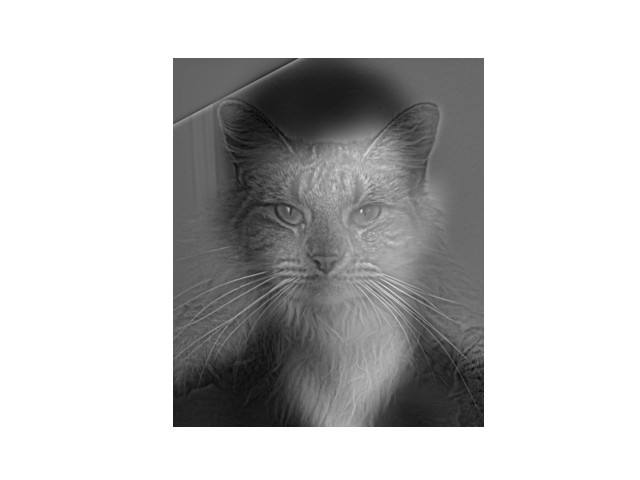

In [110]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

#### Color shift